In [35]:
# %pip install pandas
# %pip install plotly
import os
import numpy as np 
import pandas as pd

import glob
import itertools

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import plotly.express as px
import seaborn

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

DATA_PATH = "input/"

In [36]:
sub = pd.read_csv("submission.csv")
sub.head()

,tripId,UnixTimeMillis,LatitudeDegrees,LongitudeDegrees
0,2021-04-28-US-MTV-2/sensor4,1619650832999,37.395828,-122.102968
1,2021-04-28-US-MTV-2/sensor4,1619650833999,37.395851,-122.102986
2,2021-04-28-US-MTV-2/sensor4,1619650834999,37.395835,-122.103001
3,2021-04-28-US-MTV-2/sensor4,1619650835999,37.395848,-122.102960
4,2021-04-28-US-MTV-2/sensor4,1619650836999,37.395875,-122.103001


In [37]:
#df_sample_trail = pd.read_csv(DATA_PATH + "train/2020-05-15-US-MTV-1/GooglePixel4XL/device_gnss.csv")
df_sample_trail_gt = pd.read_csv("input/sensor2/ground_truth.csv")

In [38]:
df_sample_trail_gt.head(6)

,MessageType,Provider,LatitudeDegrees,LongitudeDegrees,AltitudeMeters,SpeedMps,AccuracyMeters,BearingDegrees,UnixTimeMillis
0,Fix,GT,37.416619,-122.082065,NaN,0.002044,0.1,92.968750,1589573679445
1,Fix,GT,37.416619,-122.082065,NaN,0.002198,0.1,92.969666,1589573680445
2,Fix,GT,37.416619,-122.082065,NaN,0.001414,0.1,92.969850,1589573681445
3,Fix,GT,37.416619,-122.082065,NaN,0.001414,0.1,92.969850,1589573682445
4,Fix,GT,37.416619,-122.082065,NaN,0.001414,0.1,92.969910,1589573683445
5,Fix,GT,37.416619,-122.082065,NaN,0.001780,0.1,92.969880,1589573684445


In [39]:
FILE_NAME = 'sensor2'

In [40]:
def visualize_trafic(df, center, zoom=8):
    fig = px.scatter_mapbox(df,
                            zoom=zoom,
                            center=center,
                            
                            lat="LatitudeDegrees",
                            lon="LongitudeDegrees",
                            color="MessageType",
                            labels='Provider',
                            
                            height=600,
                            width=800)
    fig.update_layout(mapbox_style='stamen-terrain')
    fig.show()

In [41]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [42]:
# %pip install --upgrade nbformat
# import nbformat
df_sample_trail_gt = pd.read_csv("input/sensor2/ground_truth.csv".format(FILE_NAME))

center = {"lat":37.42, "lon":-122.1}
# visualize_trafic(df_sample_trail_gt, center)

In [43]:
#Borrowed from prev. competition notebook
def add_lack_data(data, phoneNames, collectionNames):
    result = []
    for collectionName in collectionNames:
        for phoneName in phoneNames:
            if [collectionName, phoneName] in data:
                result.append([collectionName, phoneName, 1])
            else:
                result.append([collectionName, phoneName, 0])
    return result

In [44]:
train_phones = glob.glob("input/sensor2/*")
test_phones = glob.glob("input/sensor2/*")
train_data = [item.split("/")[-2:] for item in train_phones]
test_data = [item.split("/")[-2:] for item in test_phones]

In [45]:
phoneNames = [item.split("/")[-1:] for item in train_phones] + [item.split("/")[-1:] for item in test_phones]
phoneNames = set(list(itertools.chain.from_iterable(phoneNames)))
collectionNames = [item.split("/")[-2] for item in train_phones] + [item.split("/")[-2] for item in test_phones]

In [46]:
train_data = add_lack_data(train_data, phoneNames, collectionNames)
test_data = add_lack_data(test_data, phoneNames, collectionNames)
train_data = pd.DataFrame(train_data, columns=["collectionNames", "phoneNames", "count"])
test_data = pd.DataFrame(test_data, columns=["collectionNames", "phoneNames", "count"])

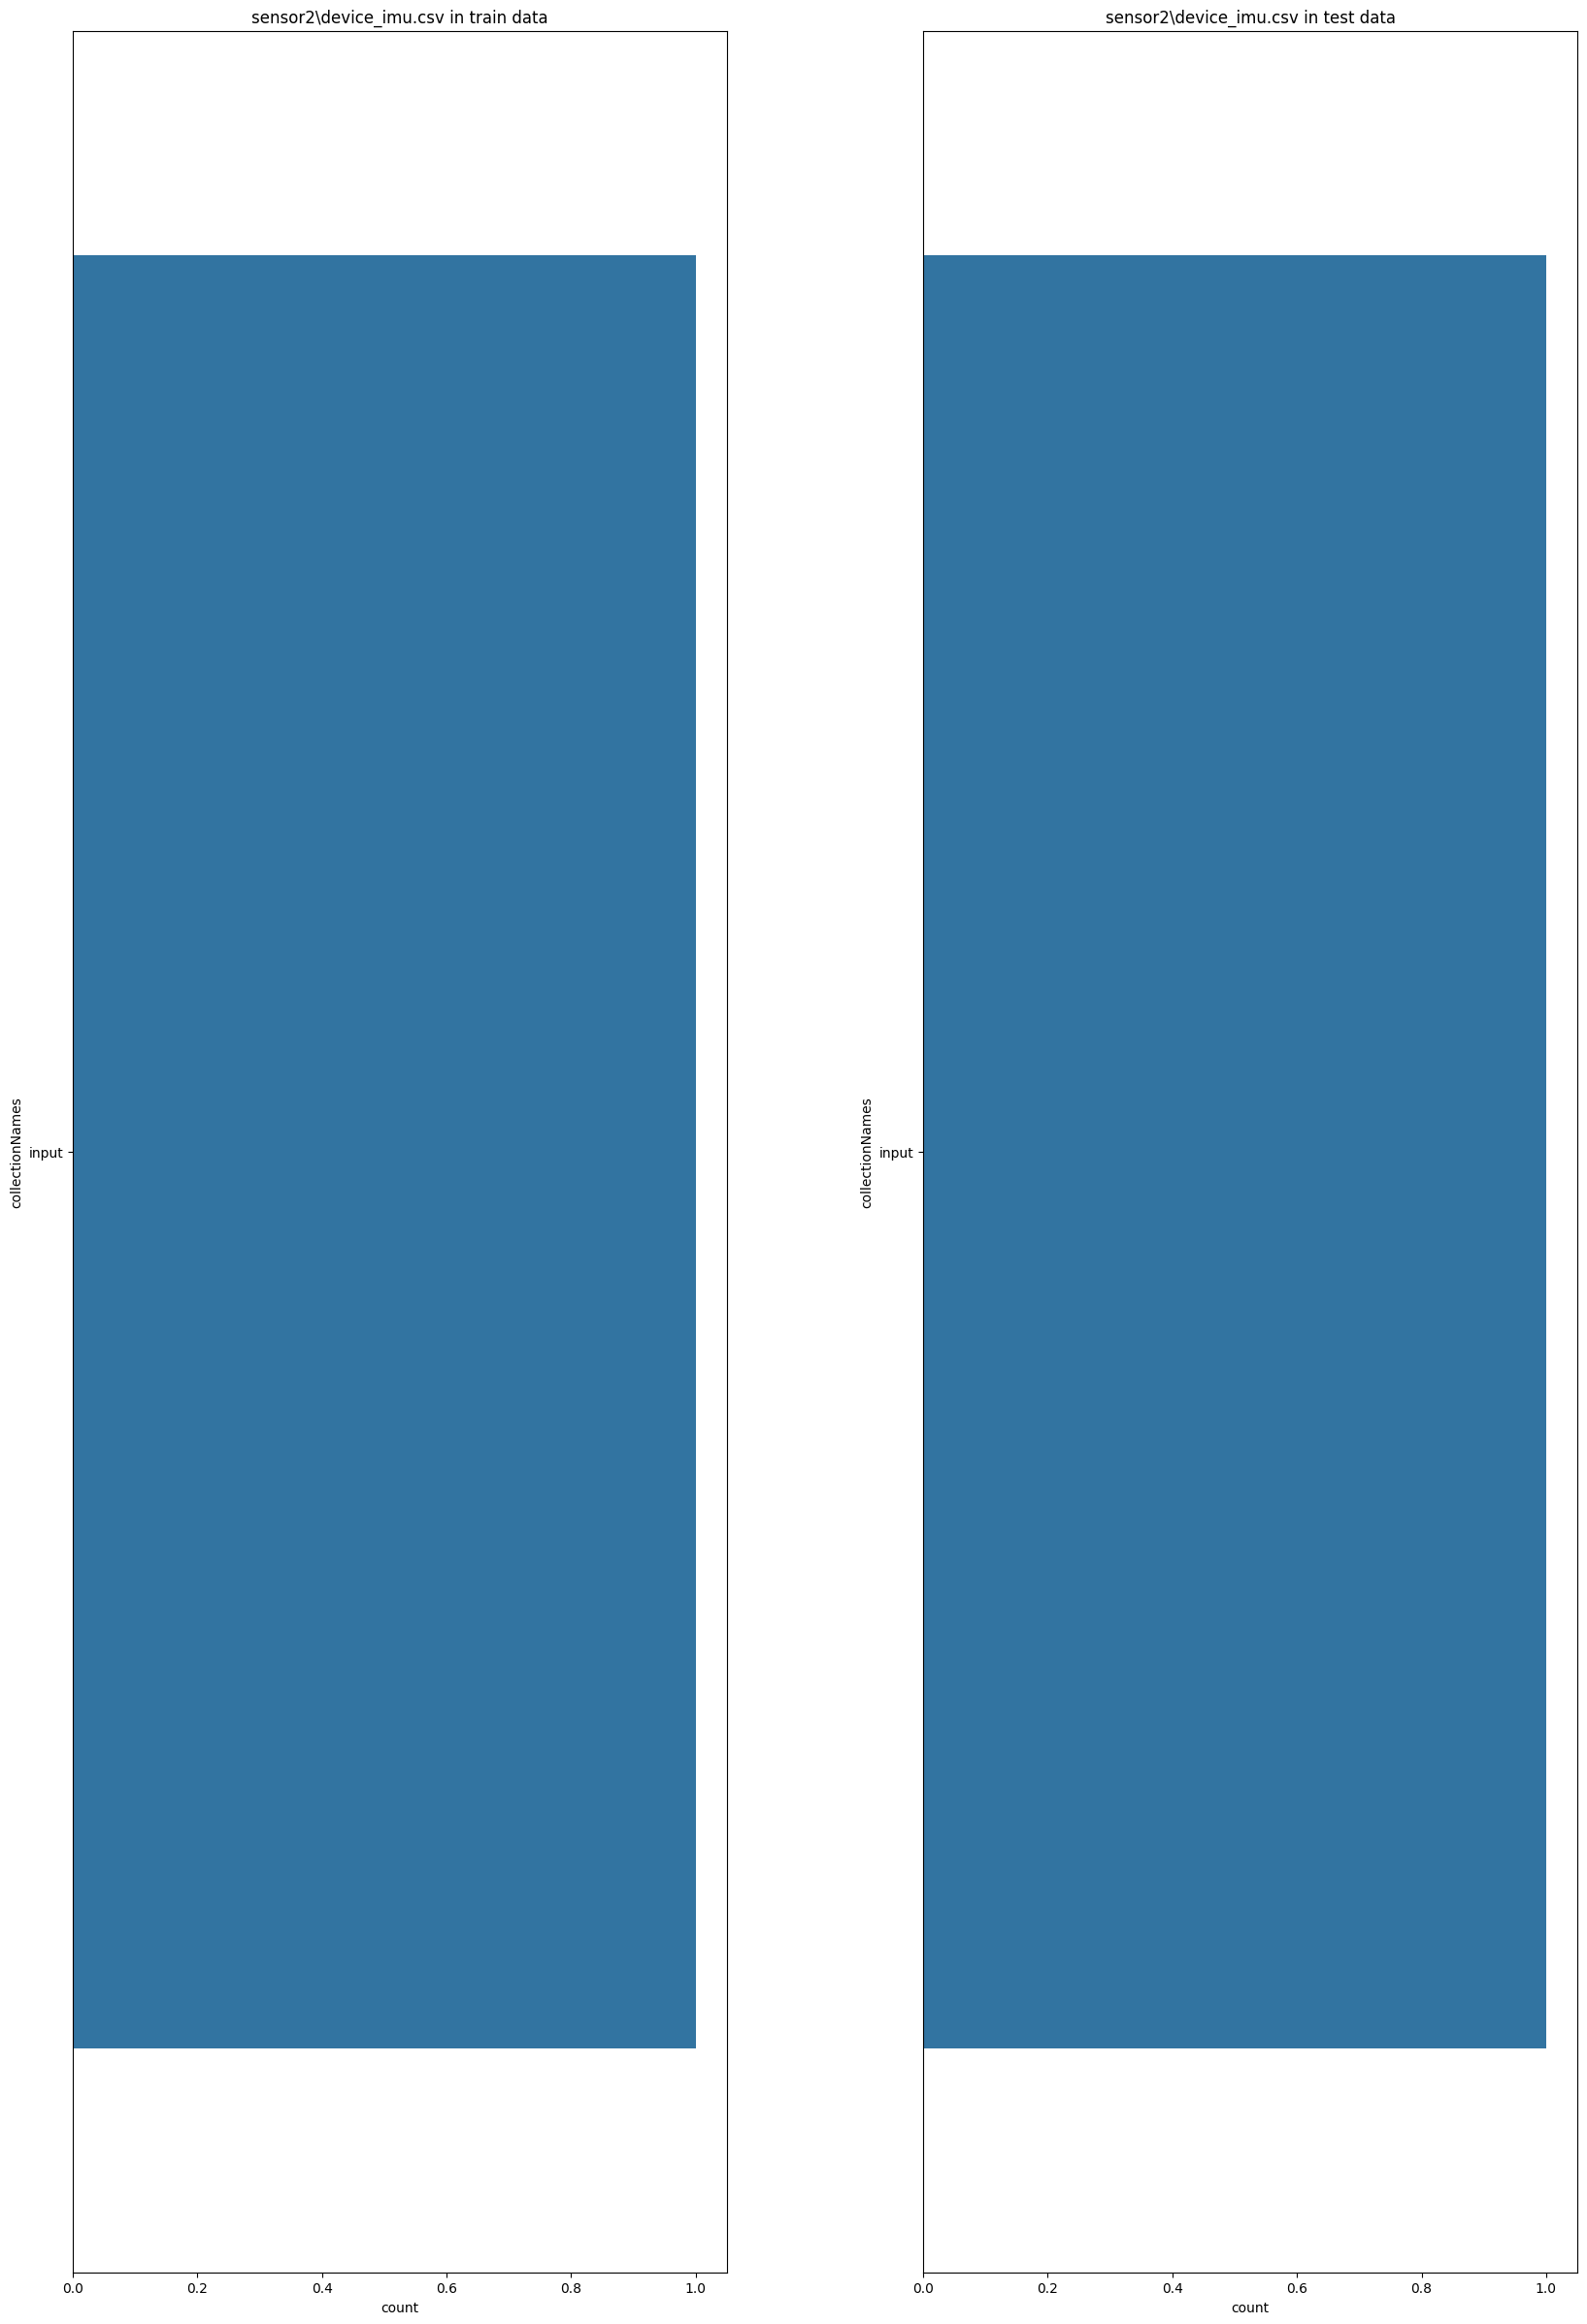

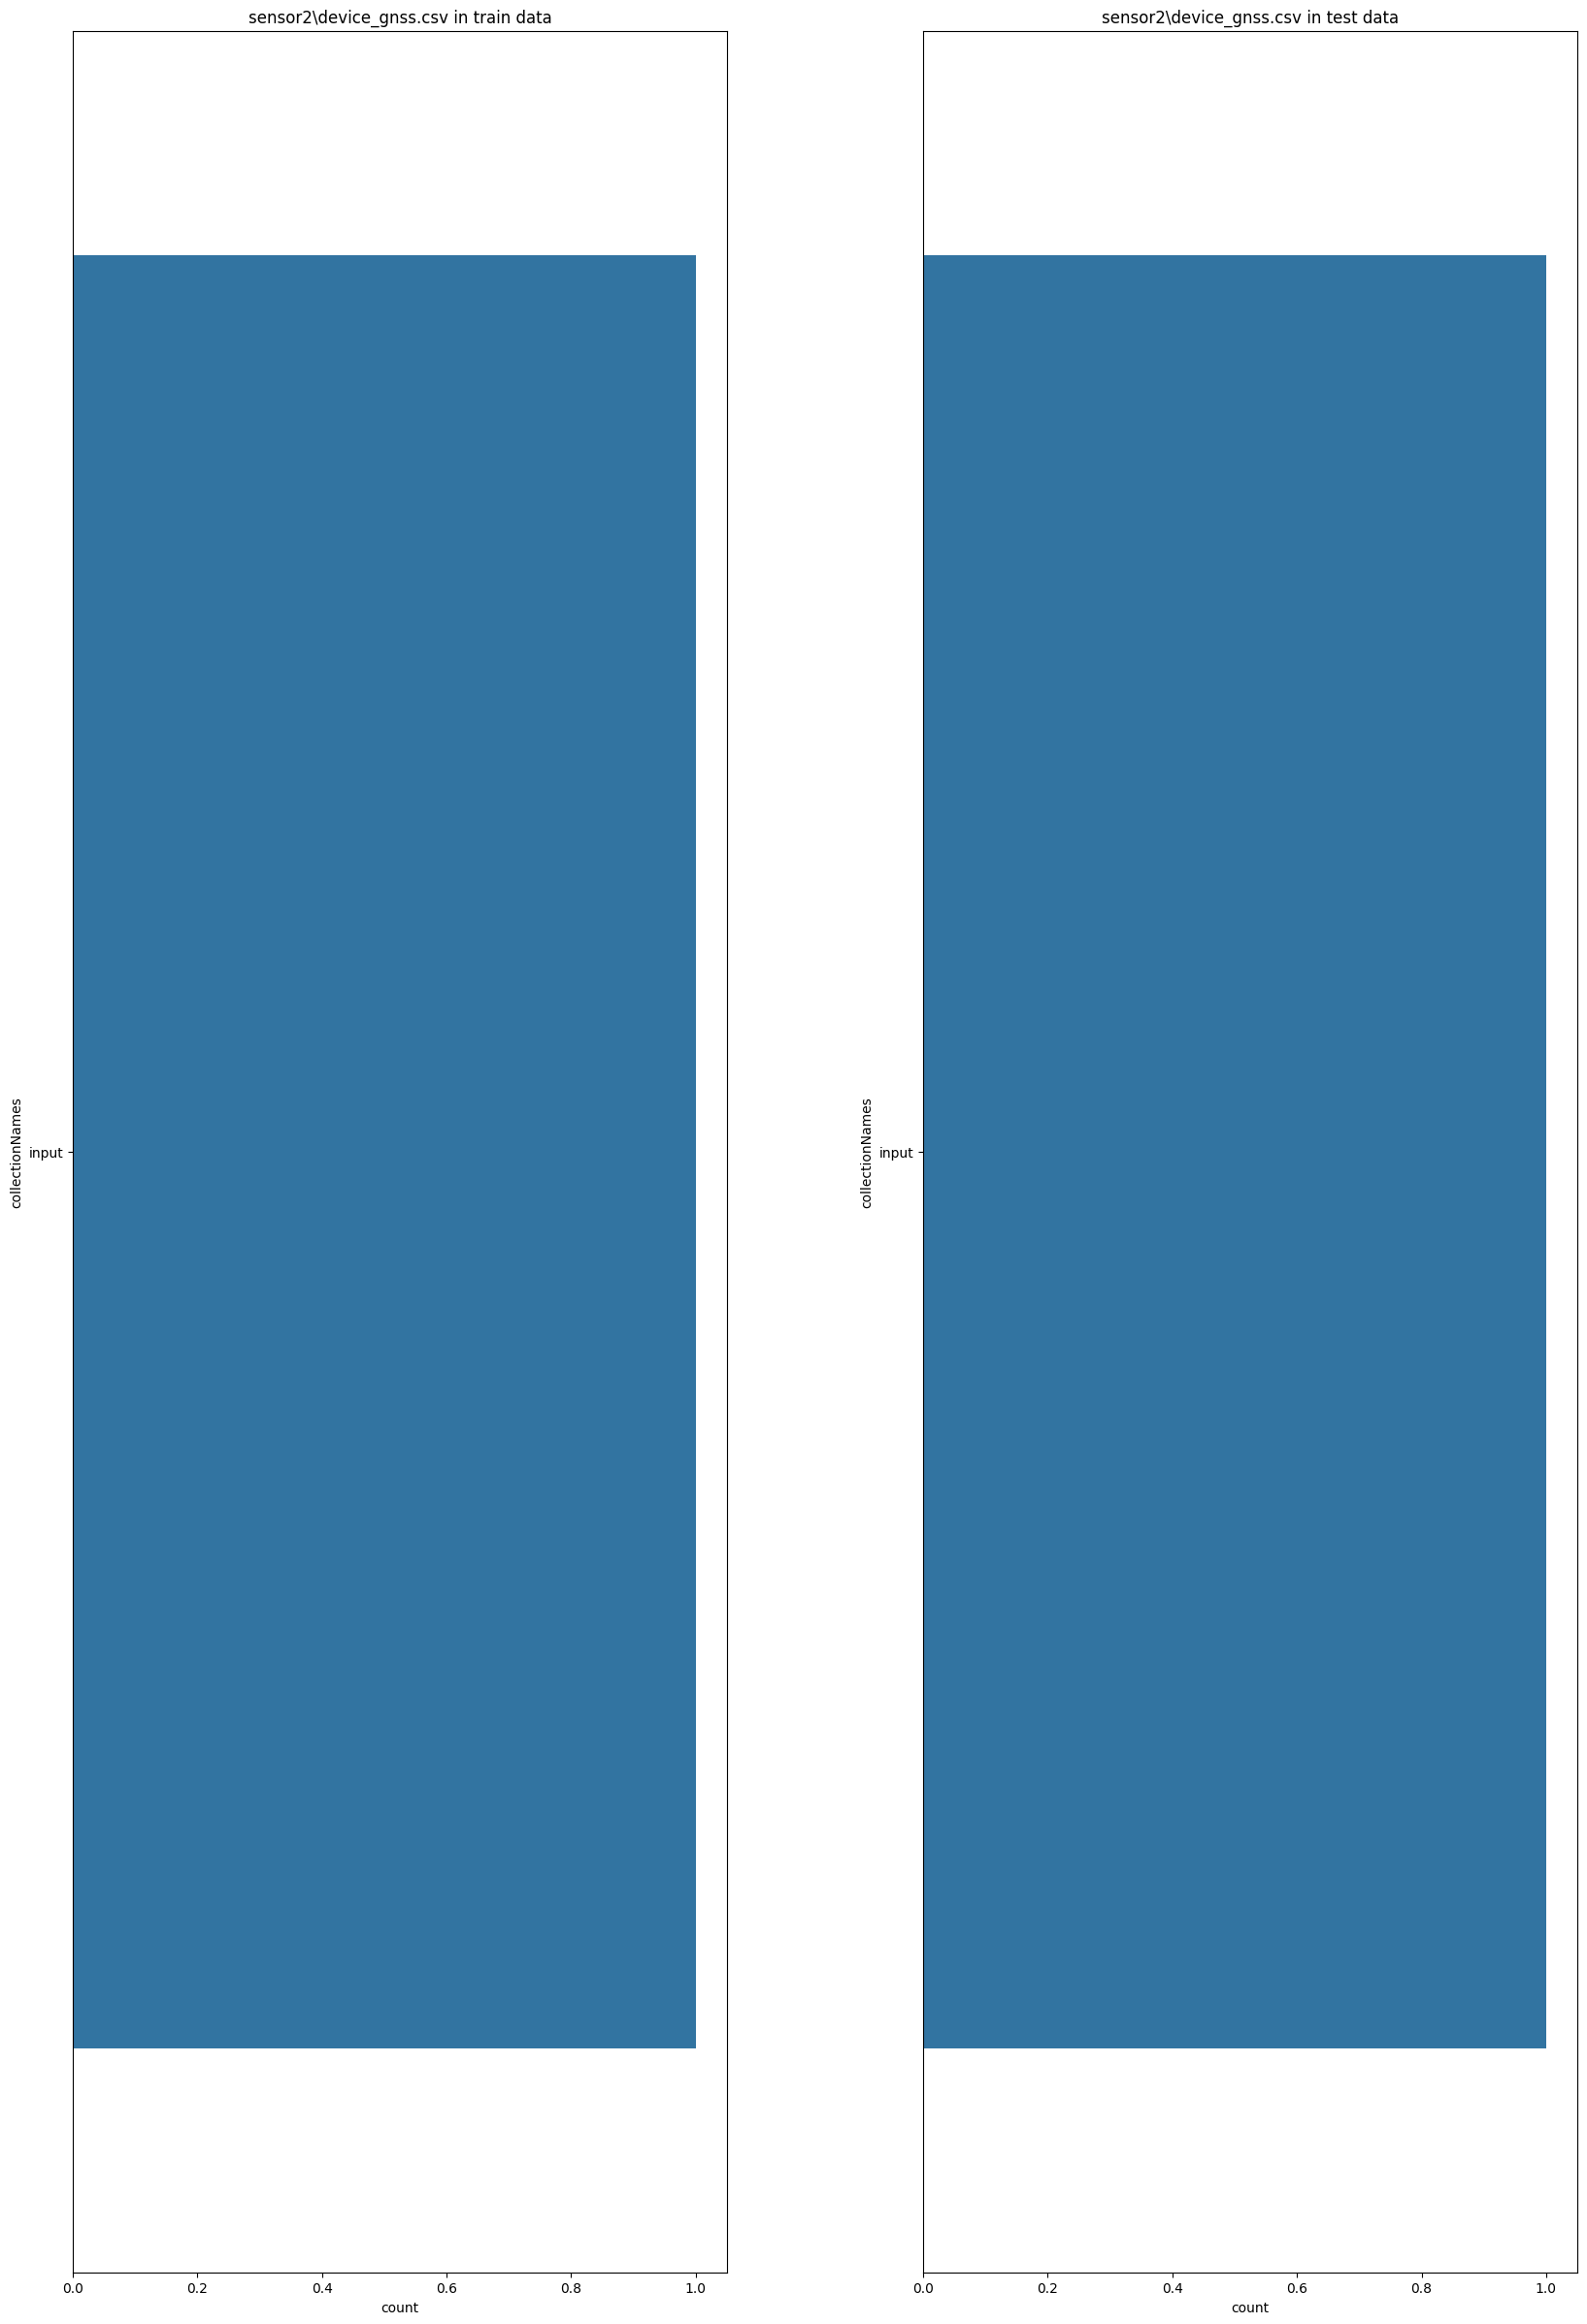

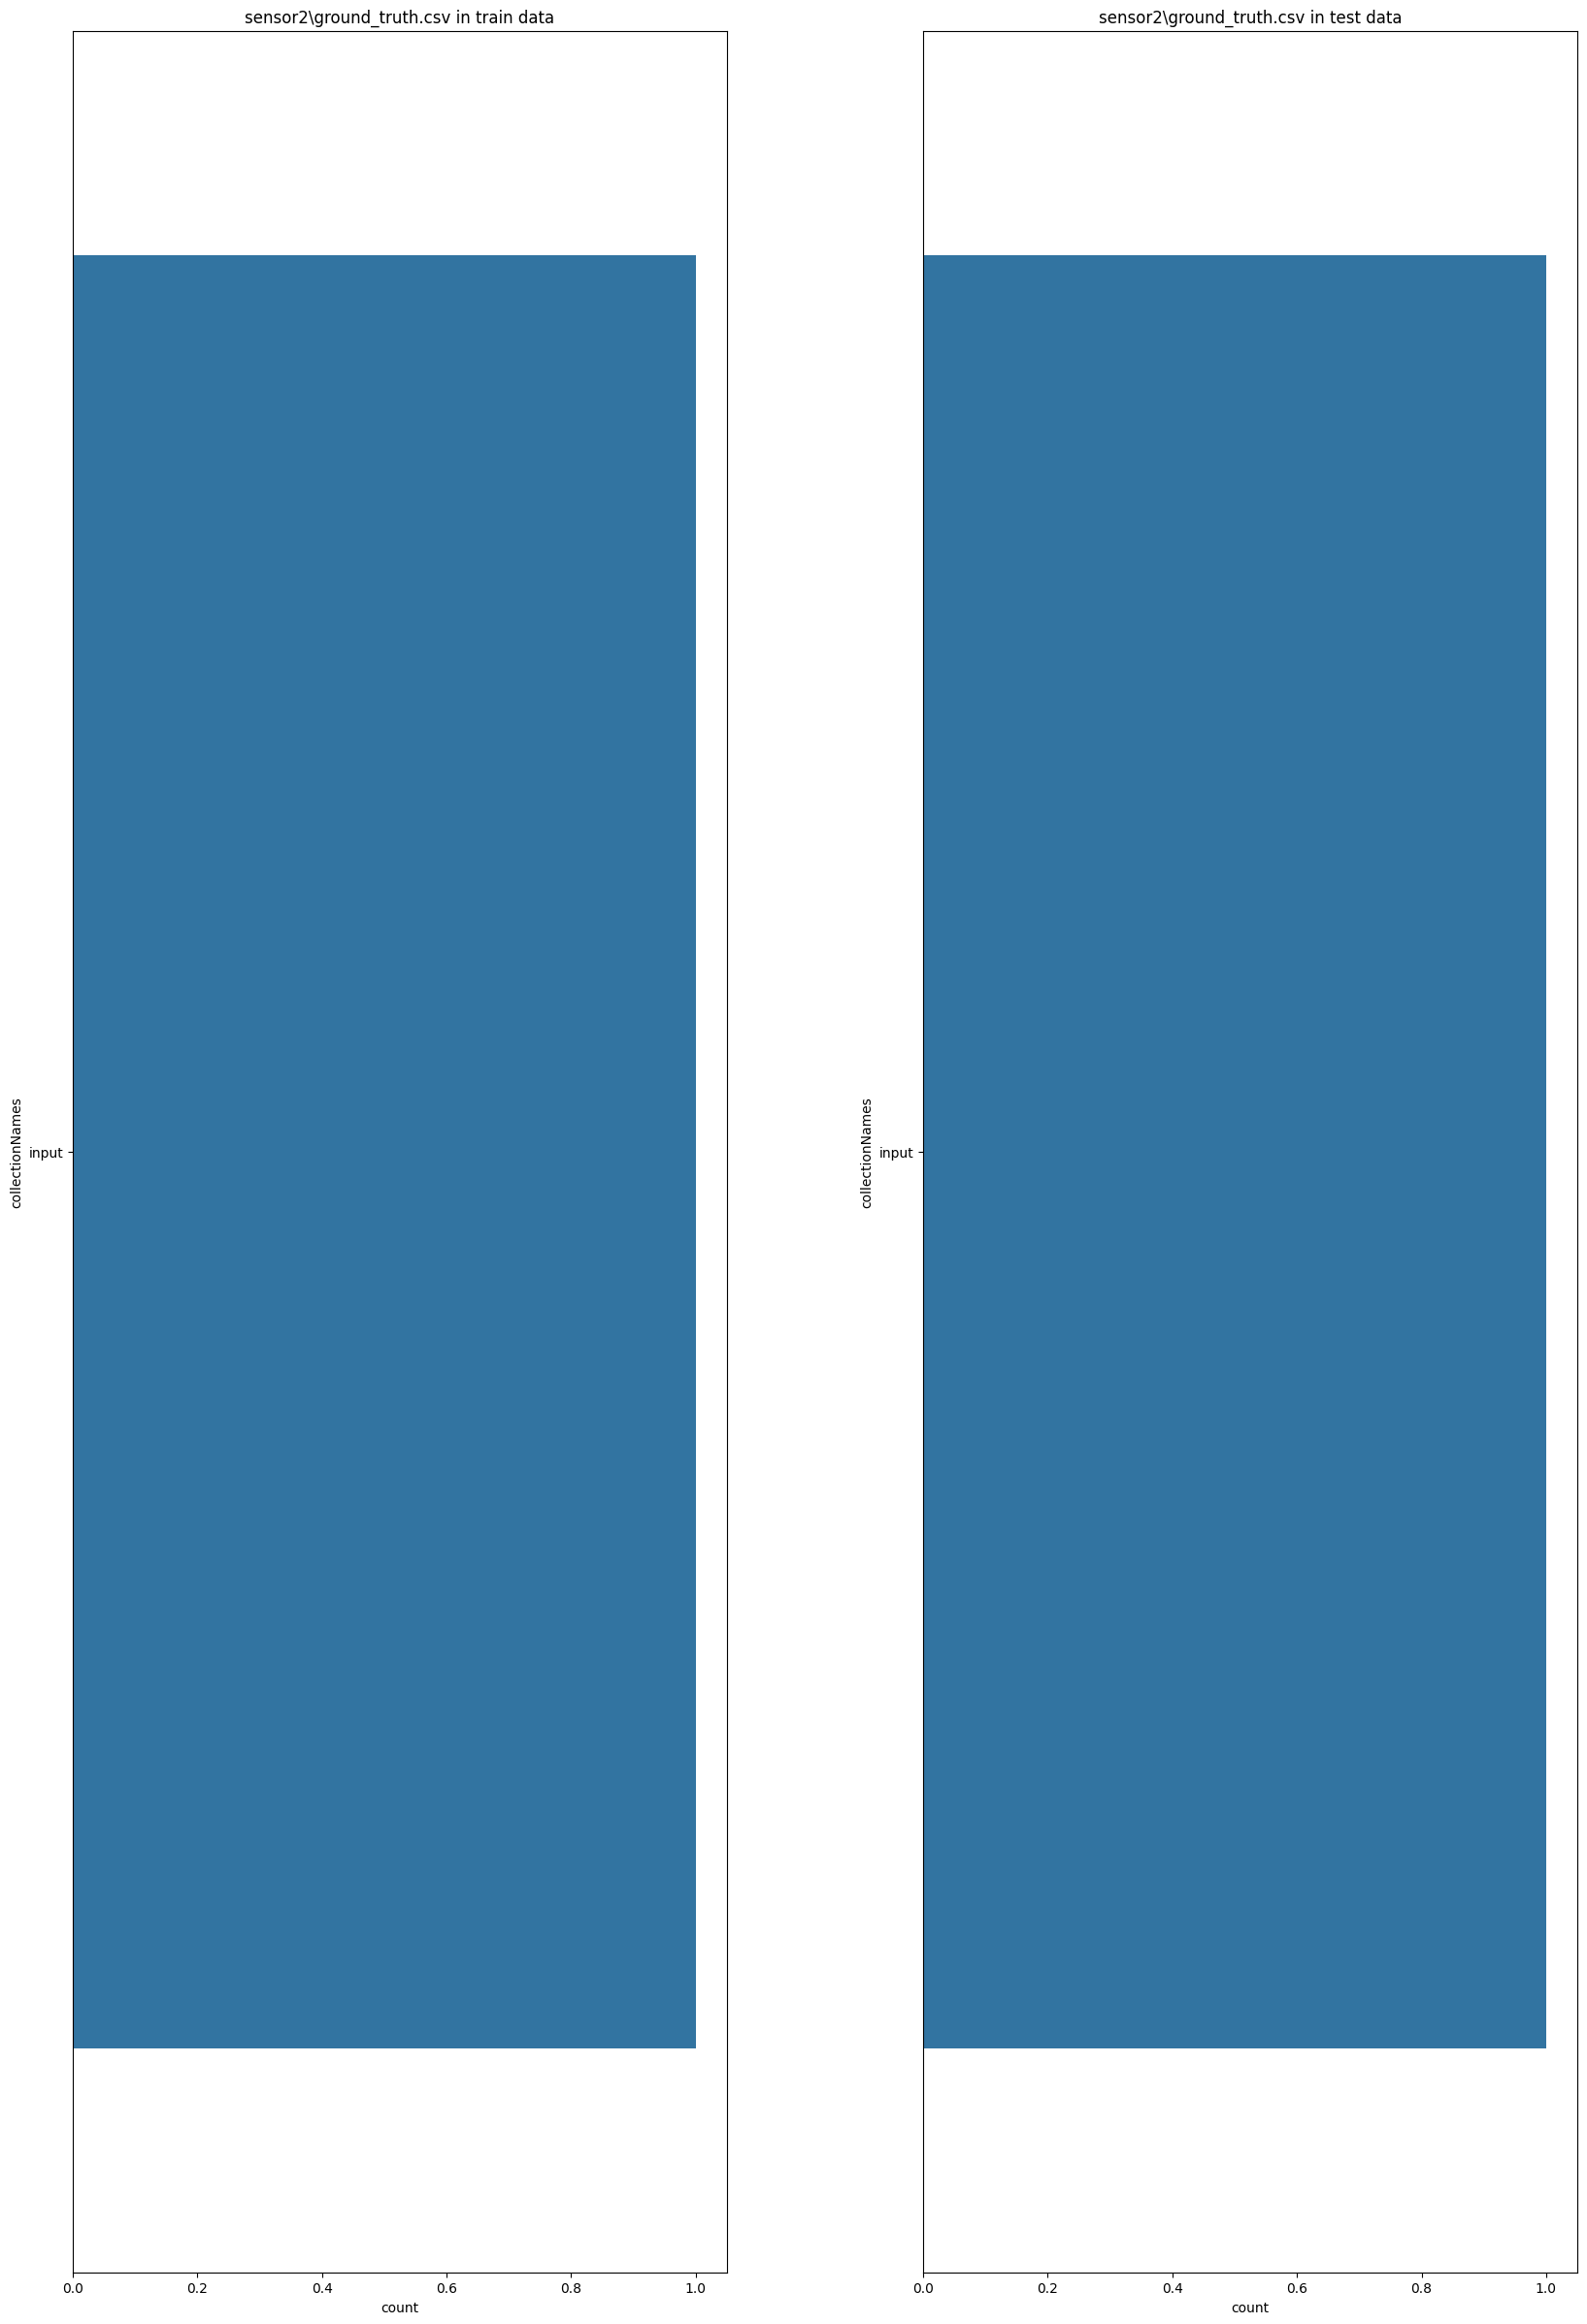

In [47]:
for phoneName in phoneNames:
    fig, axes = plt.subplots(1, 2, figsize=(20,30))
    plt.subplots_adjust(wspace=0.3, hspace=0.5)
    g1 = seaborn.barplot(data=train_data[train_data["phoneNames"] == phoneName],
                         x="count", y="collectionNames", ax=axes[0])
    g1.set_title(f"{phoneName} in train data")
    g2 = seaborn.barplot(data=test_data[test_data["phoneNames"] == phoneName],
                         x="count", y="collectionNames", ax=axes[1])
    g2.set_title(f"{phoneName} in test data")

In [48]:
# %pip install shapely
%pip install geopandas
from shapely.geometry import Point, shape
from geopandas import GeoDataFrame
from matplotlib import animation
def create_gif_track(df, git_path):
    """ Create git animation of phone track.
    """

    fig, ax = plt.subplots()

    imgs = []
    df["geometry"] = [Point(lngDeg, latDeg) for lngDeg, latDeg in zip(df["LongitudeDegrees"], df["LatitudeDegrees"])]
    gdf = GeoDataFrame(df)
    gdf.plot(color="lightskyblue", ax=ax)
    
    for i in range(0, len(gdf), 10):
        p = ax.plot(gdf.iloc[i]["LongitudeDegrees"], gdf.iloc[i]["LatitudeDegrees"], 
                    color = 'dodgerblue', marker = 'o', markersize = 10)
        imgs.append(p)

    # Create animation and saving it
    ani = animation.ArtistAnimation(fig, imgs, interval=200)
    ani.save(git_path, writer='imagemagick', dpi = 300)

Note: you may need to restart the kernel to use updated packages.


MovieWriter imagemagick unavailable; using Pillow instead.


CPU times: total: 41.1 s
Wall time: 1min 10s


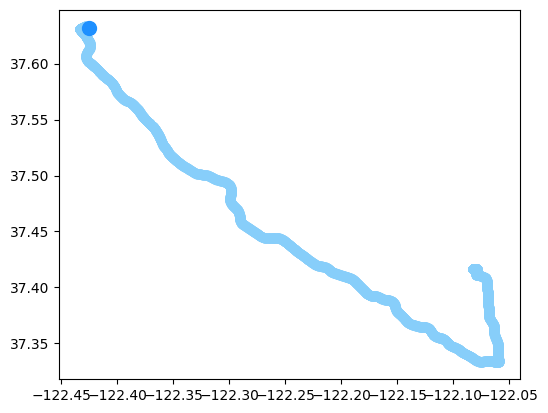

In [49]:
%%time

gif_gt = pd.read_csv("input/sensor2/ground_truth.csv")

create_gif_track(gif_gt, "sensor2.gif")

![](./2021_04_29_US_SJC_2_Pixel4_gt.gif)